In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
# New Neural Network
def preprocess_data(x_train, y_train, x_test, y_test, num_classes=10):
    x_train = x_train.reshape(-1, 784) / 255.0
    x_test = x_test.reshape(-1, 784) / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

class MLPModel:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()

    def build_model(self):
        model = Sequential([
            Flatten(input_shape=self.input_shape),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(self.num_classes, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, epochs=5, batch_size=128):
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

In [3]:
class NeuronActivationComputer:
    def __init__(self, model, x_test, y_test):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test

    def compute_activations(self):
        num_classes = self.y_test.shape[-1]

        # Get the layer outputs for the test data
        layer_outputs = []
        for layer in self.model.layers:
            if hasattr(layer, 'output'):
                layer_model = tf.keras.Model(inputs=self.model.input, outputs=layer.output)
                layer_outputs.append(layer_model.predict(self.x_test))

        # Compute the neuron activations averaged for each label and each layer
        layer_activations = []
        for outputs in layer_outputs:
            num_neurons_in_layer = outputs.shape[-1]
            layer_activation = np.zeros((num_classes, num_neurons_in_layer))
            for label_idx in range(num_classes):
                layer_activation[label_idx] = np.mean(outputs[np.argmax(self.y_test, axis=1) == label_idx], axis=0)
            layer_activations.append(layer_activation)

        return layer_activations

    def visualize_activations(self, layer_idx, class_idx=None):
        layer_activations = self.compute_activations()
        activations = layer_activations[layer_idx]

        if class_idx is None:
            # Visualize activations for all classes
            fig, axs = plt.subplots(2, 5, figsize=(15, 10))
            axs = axs.flatten()  # Flatten the array of axes to easily iterate over it

            for class_label, class_activations in enumerate(activations):
                # Convert activations to numpy array for plotting
                class_activations = np.array(class_activations)

                # Create a bar plot for the activations
                axs[class_label].bar(range(len(class_activations)), class_activations)
                axs[class_label].set_title(f'Activations for Class {class_label}')
                axs[class_label].set_xlabel('Activation Index')
                axs[class_label].set_ylabel('Activation Value')

            plt.tight_layout()
            plt.show()
        else:
            # Visualize activations for a specific class
            print(f"Class {class_idx}:")
            print(activations[class_idx])

    def visualize_activations_for_neuron(self, layer_idx, neuron_idx):
        layer_activations = self.compute_activations()
        activations = layer_activations[layer_idx]

        # Visualize the activations for the specified neuron
        neuron_activations = [class_activations[neuron_idx] for class_activations in activations]
        plt.bar(range(len(neuron_activations)), neuron_activations)
        plt.title(f'Activations for Neuron {neuron_idx}')
        plt.xlabel('Class Index')
        plt.ylabel('Activation Value')
        plt.show()

    def visualize_activations_for_layer(self, visual_type):
        layer_outputs = []
        for layer in self.model.layers:
            if hasattr(layer, 'output'):
                layer_model = tf.keras.Model(inputs=self.model.input, outputs=layer.output)
                layer_outputs.append(layer_model.predict(self.x_test))

        # Compute the neuron activations averaged for each label and each layer
        layer_activations = []
        for outputs in layer_outputs:
            num_neurons_in_layer = outputs.shape[-1]
            layer_activation = np.zeros((self.y_test.shape[-1], num_neurons_in_layer))
            for label_idx in range(self.y_test.shape[-1]):
                layer_activation[label_idx] = np.mean(outputs[np.argmax(self.y_test, axis=1) == label_idx], axis=0)
            layer_activations.append(layer_activation)

        # Visualize the activations for each layer
        if visual_type == 1:
            for layer in layer_activations:
                plt.figure(figsize=(5, 12))  # Set the initial figure size
                plt.matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
                plt.gcf().set_figheight(5)
                plt.gcf().set_figwidth(30)
                plt.show()
        elif visual_type == 2:
            fig = plt.figure(figsize=(15, 10))

            gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])
            ax0 = plt.subplot(gs[0, :])
            ax1 = plt.subplot(gs[1, 0])
            ax2 = plt.subplot(gs[1, 1])
            ax3 = plt.subplot(gs[1, 2])

            axes = [ax0, ax1, ax2, ax3]

            for i, ax in enumerate(axes):
                layer = layer_activations[i]
                im = ax.matshow(layer, cmap='hot', interpolation='nearest', aspect=10)
                ax.set_title(f'Layer {i+1} Activations')

            plt.tight_layout()
            plt.show()
        else:
            fig, axs = plt.subplots(4, 1, figsize=(30, 60))

            for i, layer in enumerate(layer_activations):
                im = axs[i].matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
                axs[i].set_title(f'Layer {i+1} Activations')

            # Add a colorbar to the figure
            fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.02)

            plt.tight_layout()
            plt.show()

    def analyze_activations(self, layer_idx, analysis_function):
        layer_activations = self.compute_activations()
        activations = layer_activations[layer_idx]

        # Apply the analysis function to the activations
        analysis_result = analysis_function(activations)

        return analysis_result



Epoch 1/5


469/469 [==============================] - 2s 2ms/step - loss: 0.3370 - accuracy: 0.9033
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1336 - accuracy: 0.9609
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9729
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9791
Epoch 5/5
313/313 [==============================] - 0s 896us/step


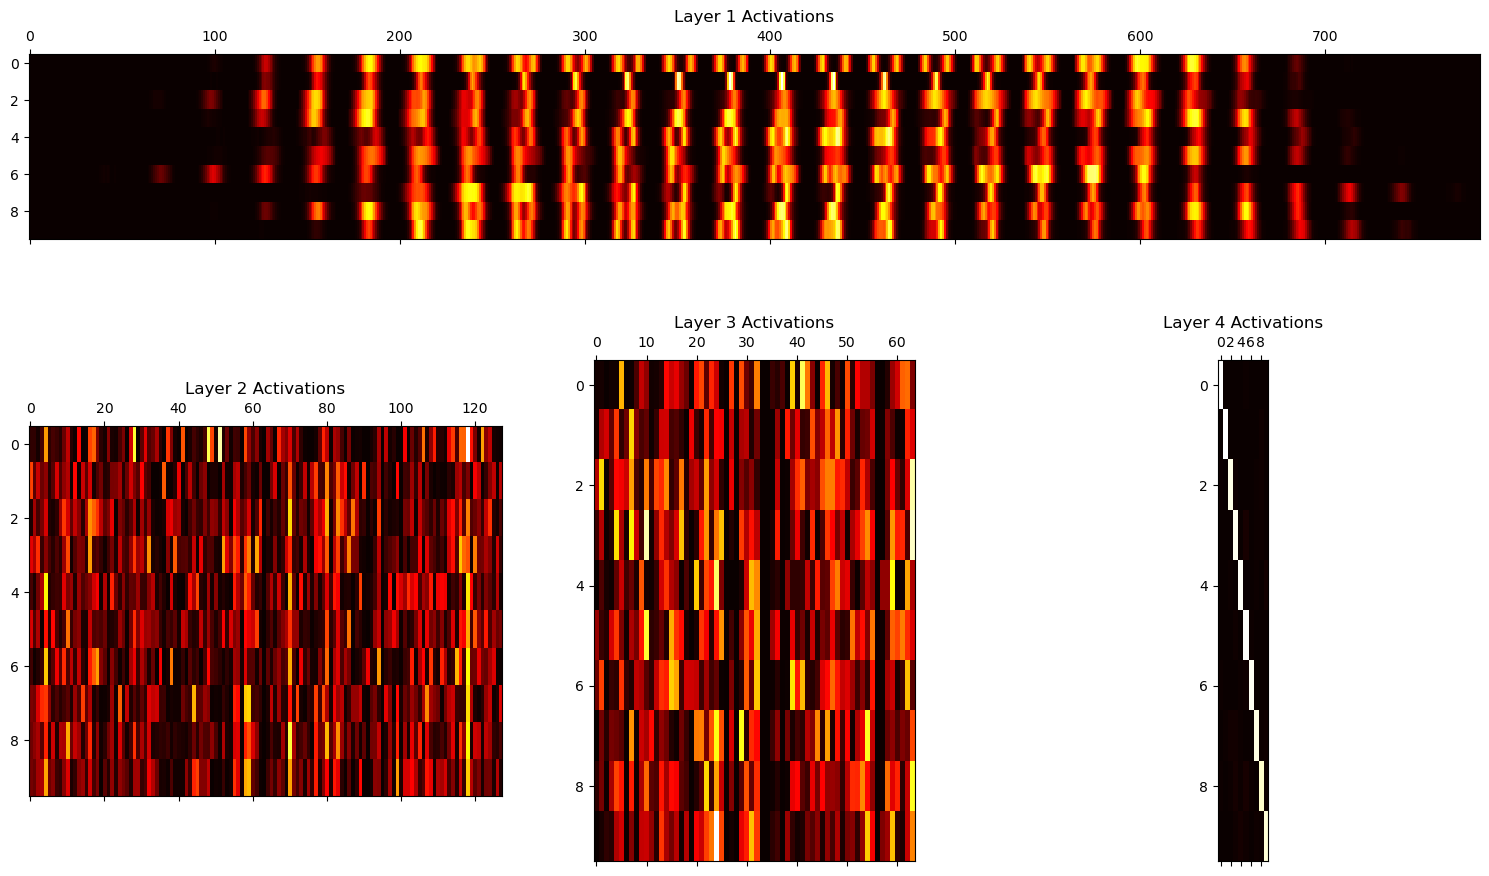

In [4]:
# Load your dataset
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test)

# Create an instance of the MLPModel
mlp_model = MLPModel(input_shape=(784,), num_classes=10)

# Train the model
mlp_model.train(x_train, y_train)

# Compute neuron activations
neuron_activation_computer = NeuronActivationComputer(mlp_model.model, x_test, y_test)
layer_activations = neuron_activation_computer.compute_activations()
neuron_activation_computer.visualize_activations_for_layer(2)

In [ ]:
# Here I am going to graph the initial 4 activation before I start
just_4 = []
just_7 = []

max_len = max(len(layer) for layer in layer_activations)  # Find the maximum length

for layer in layer_activations:
    padded_layer = np.pad(layer, (0, max_len - len(layer)), 'constant', constant_values=0)  # Pad the layer
    just_4.append(padded_layer[4])
    just_7.append(padded_layer[7])
# Find the maximum length of any list in just_4
max_len = max(len(lst) for lst in just_4)

# Pad each list in just_4 to make them the same length
just_4_padded = [np.pad(lst, (0, max_len - len(lst)), 'constant', constant_values=0) for lst in just_4]

# Convert the padded list of lists to a numpy array
just_4_array = np.array(just_4_padded)
# Create a heatmap
plt.imshow(just_4_array, cmap='hot', interpolation='nearest', aspect=100)
plt.colorbar()  # Show color scale
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(20)
plt.ylabel('Layers')
plt.xlabel('Neurons')
plt.show()